In [58]:
# ingest the data

In [2]:
import pandas as pd

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

I have solved EDA step by step

In [3]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\fsdsmendtoend-main\fsdsmendtoend-main\notebooks\data\gemstone.csv.csv")

In [4]:
data.head(6)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502


In [5]:
data.head()
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
data.to_csv('data.csv', index=False)

In [6]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [7]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
25006,25007,0.36,Ideal,G,VS1,61.3,56.0,4.60,4.64,2.83,746
7401,7402,1.00,Good,H,VS1,61.8,61.0,6.40,6.31,3.93,5219
393,394,0.30,Ideal,E,VVS2,61.8,56.0,4.35,4.33,2.68,1013
25664,25665,0.32,Premium,H,VVS2,NaN,58.0,4.33,4.37,2.71,645
9324,9325,0.44,Ideal,D,VS1,62.3,55.0,4.85,4.88,3.03,1235


In [8]:
data.isnull().sum()

id           0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26270 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       26270 non-null  int64  
 1   carat    26270 non-null  float64
 2   cut      26270 non-null  object 
 3   color    26270 non-null  object 
 4   clarity  26270 non-null  object 
 5   depth    26270 non-null  float64
 6   table    26270 non-null  float64
 7   x        26270 non-null  float64
 8   y        26270 non-null  float64
 9   z        26270 non-null  float64
 10  price    26270 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.4+ MB


In [11]:
data=data.drop(labels=["id"],axis=1)

In [12]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [13]:
data.duplicated().sum()

34

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(26236, 10)

In [16]:
# cat and num columns

categorical_columns=data.columns[data.dtypes=="object"]

In [17]:
numerical_columns=data.columns[data.dtypes!="object"]

In [18]:
data[categorical_columns].describe()

,cut,color,clarity
count,26236,26236,26236
unique,5,7,8
top,Ideal,G,SI1
freq,10535,5521,6402


In [20]:
data[categorical_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


https://www.vrai.com/journal/post/diamond-cut

In [21]:
data[categorical_columns]["cut"].value_counts()

cut
Ideal        10535
Premium       6694
Very Good     5875
Good          2376
Fair           756
Name: count, dtype: int64

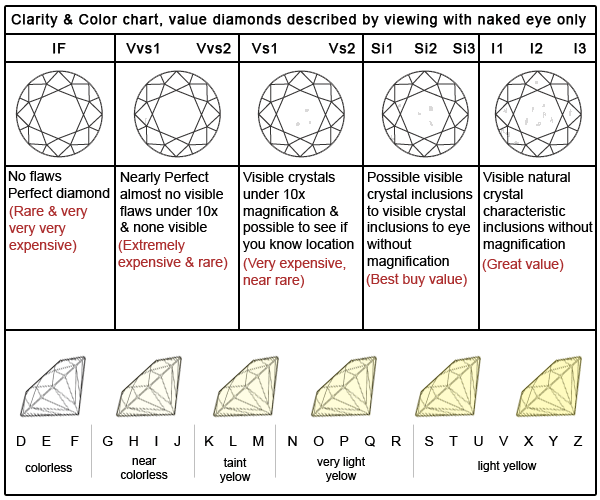

In [22]:
data[categorical_columns]["color"].value_counts()

color
G    5521
E    4792
F    4606
H    3984
D    3265
I    2670
J    1398
Name: count, dtype: int64

In [23]:
data[categorical_columns]['clarity'].value_counts()

clarity
SI1     6402
VS2     5919
SI2     4436
VS1     3985
VVS2    2478
VVS1    1791
IF       871
I1       354
Name: count, dtype: int64

In [24]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26236.0,0.797620,0.476691,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26236.0,57.455877,2.230866,49.0,56.00,57.00,59.00,79.00
x,26236.0,5.728646,1.126332,0.0,4.71,5.69,6.54,10.23
y,26236.0,5.732487,1.165283,0.0,4.72,5.70,6.54,58.90
z,26236.0,3.536339,0.698608,0.0,2.90,3.52,4.04,8.06
price,26236.0,3935.926818,4019.809223,326.0,945.00,2374.00,5356.00,18818.00


In [25]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


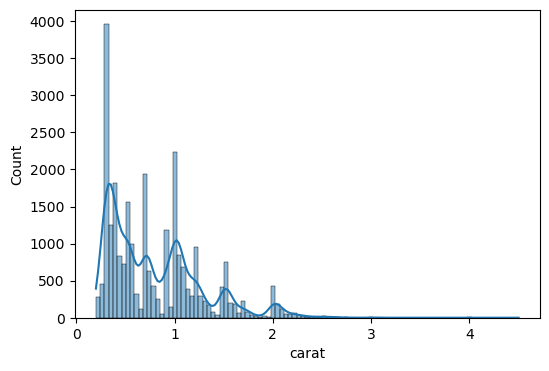

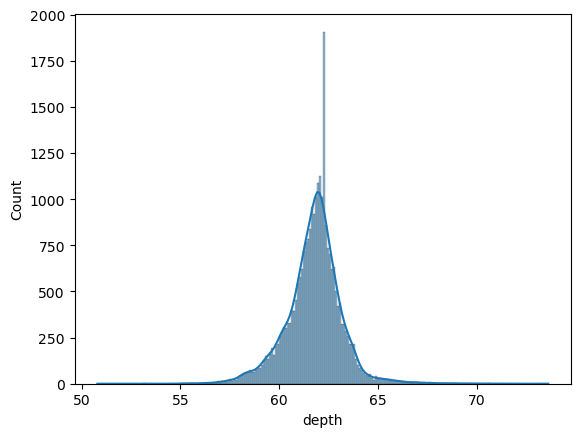

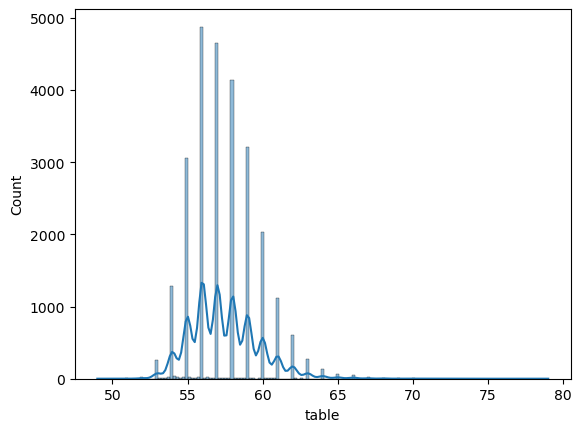

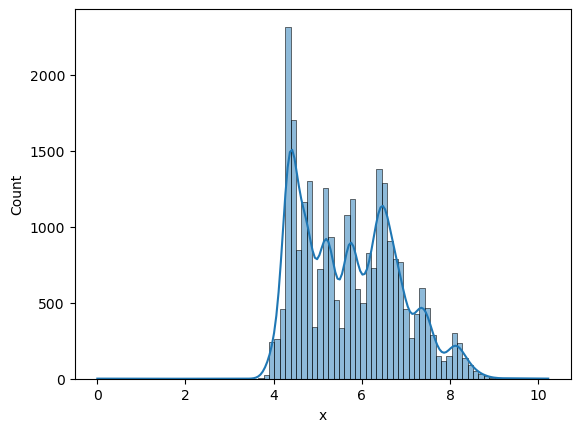

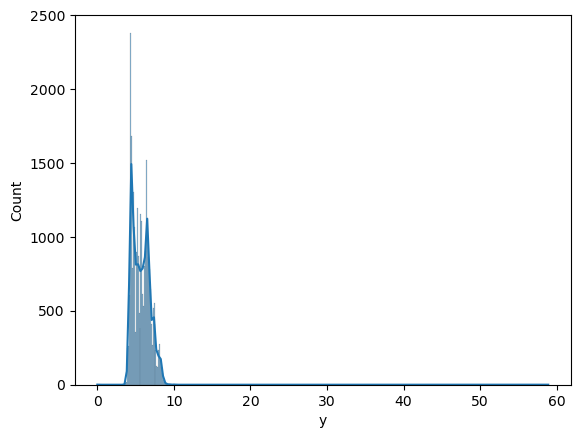

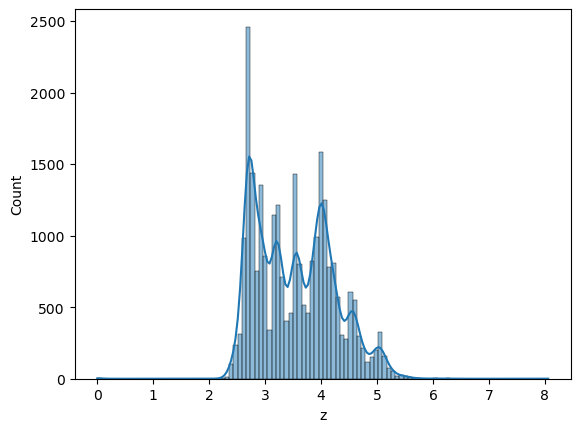

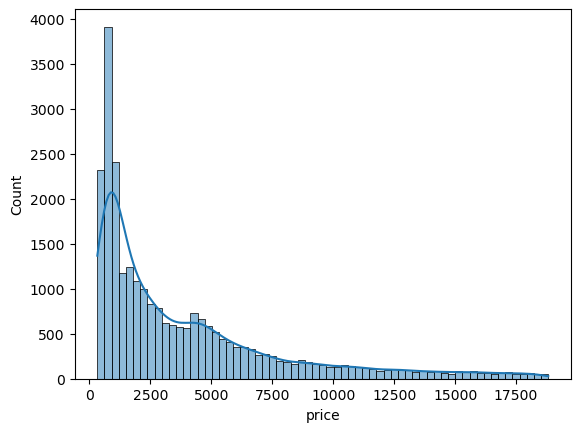

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

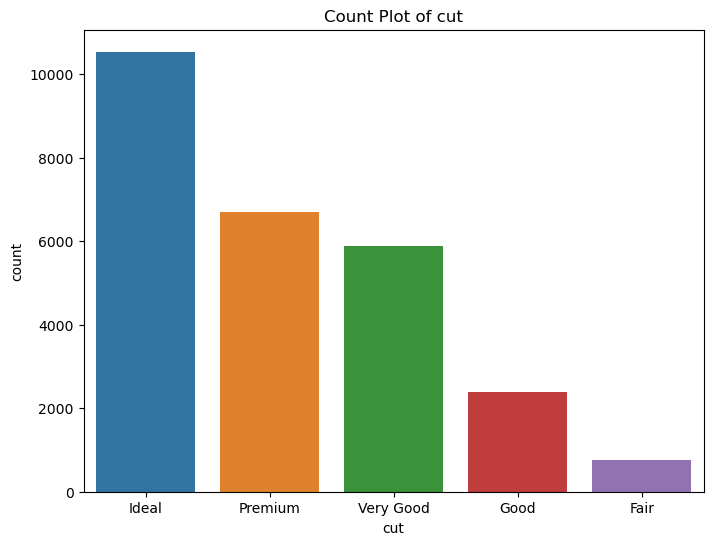

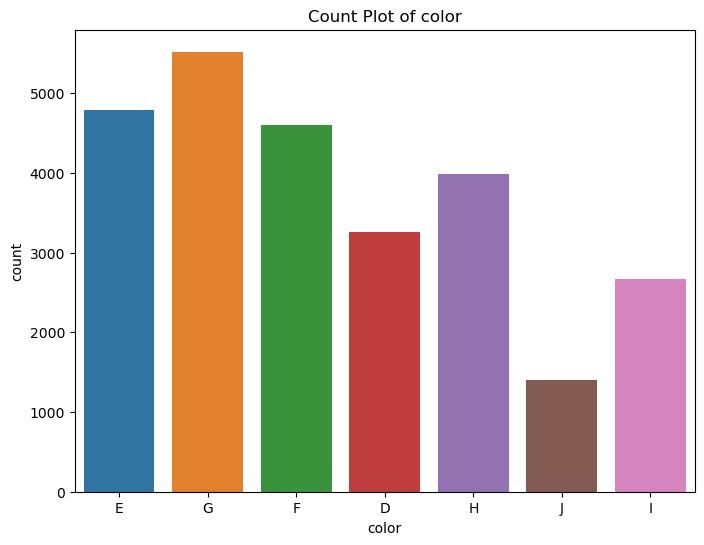

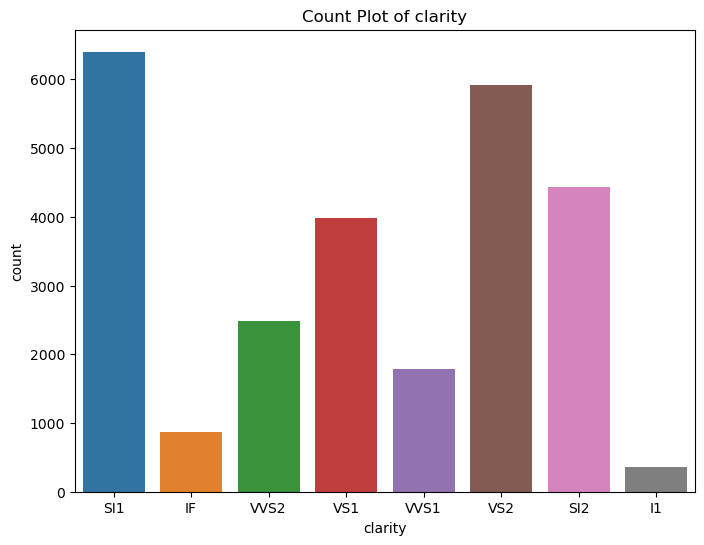

In [29]:
# categorical data
# assignment is you have to take all the categorical col and you need to plot either bar plot or count
import seaborn as sns
import matplotlib.pyplot as plt



# Plotting all categorical columns
for column in data.select_dtypes(include='object'):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Count Plot of {column}')
    plt.show()


<Axes: >

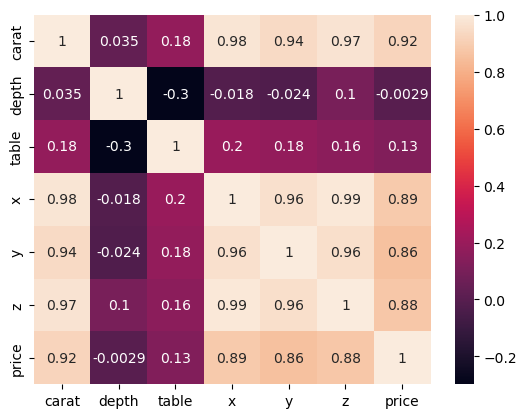

In [27]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [28]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [29]:
# encoding

data["clarity"].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [30]:

data["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [31]:

data["color"].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [32]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [33]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [34]:
data.drop(labels="id",axis=1,inplace=True)

KeyError: "['id'] not found in axis"

In [35]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,4,3,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,5,8,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,4,2,4,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,3,6,61.8,56.0,4.19,4.20,2.60,682
